In [ ]:
import pandas as pd 
import numpy as np #for array operations
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data = pd.read_csv('athlete_events.csv')

In [4]:
df = data.copy()

In [5]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
len(df)

271116

In [27]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

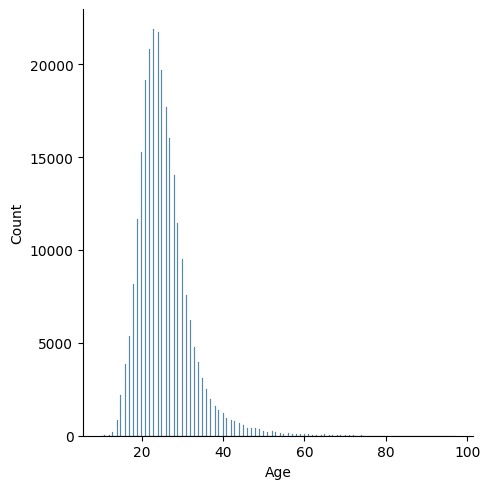

In [26]:
#Filling the null values of the age based on the medain
sns.displot(df['Age'])

In [28]:
df['Age'].fillna(df['Age'].median(),inplace=True)

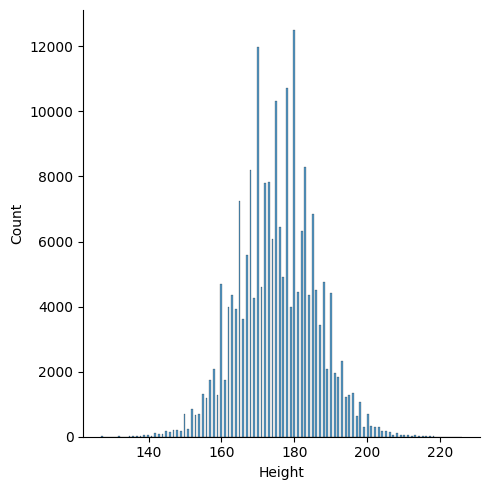

In [29]:
#Filling the null values of the Height
sns.displot(df['Height'])

In [31]:
df['Height'].fillna(df['Height'].mean(),inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_31728\2690654946.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Height'].fillna(df['Height'].mean(),inplace=True)


In [30]:
df['Height'].describe()

count    210945.000000
mean        175.338970
std          10.518462
min         127.000000
25%         168.000000
50%         175.000000
75%         183.000000
max         226.000000
Name: Height, dtype: float64

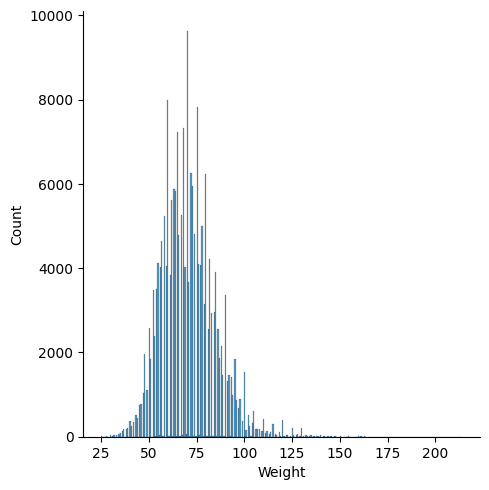

In [32]:
#Filling the null values of the Height
sns.displot(df['Weight'])

In [34]:
#Filling the null values of the Height
df['Weight'].describe()

count    208241.000000
mean         70.702393
std          14.348020
min          25.000000
25%          60.000000
50%          70.000000
75%          79.000000
max         214.000000
Name: Weight, dtype: float64

In [35]:
df['Weight'].fillna(df['Weight'].mean(),inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_31728\371550695.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight'].fillna(df['Weight'].mean(),inplace=True)


In [36]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [37]:
df['Medal'].fillna('No Medal',inplace=True)

In [38]:
df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [41]:
summer = df[df['Season'] == 'Summer']

In [42]:
summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.00000,70.702393,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No Medal


In [43]:
summer['Season'].unique()

array(['Summer'], dtype=object)

In [44]:
summer['Age'].mean()

25.604932779754844

In [47]:
#Trim Mean (Good when we have outliers)
from scipy.stats import trim_mean
trim_mean(summer['Age'],0.1)

24.854371440446638

In [49]:
np.percentile(summer['Age'],99)

49.0

In [50]:
np.percentile(summer['Age'],1)

15.0

In [51]:
summer['Age'].min()

10.0

In [52]:
summer[summer['Age']<12]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
73461,37333,Carlos Bienvenido Front Barrera,M,11.0,175.33897,70.702393,Spain,ESP,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Coxed Eights,No Medal
79024,40129,Luigina Giavotti,F,11.0,175.33897,70.702393,Italy,ITA,1928 Summer,1928,Summer,Amsterdam,Gymnastics,Gymnastics Women's Team All-Around,Silver
142882,71691,Dimitrios Loundras,M,10.0,175.33897,70.702393,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze
252230,126307,Liana Vicens,F,11.0,158.00000,50.000000,Puerto Rico,PUR,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 100 metres Breaststroke,No Medal
252231,126307,Liana Vicens,F,11.0,158.00000,50.000000,Puerto Rico,PUR,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 200 metres Breaststroke,No Medal
252232,126307,Liana Vicens,F,11.0,158.00000,50.000000,Puerto Rico,PUR,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 200 metres Individual Medley,No Medal
252233,126307,Liana Vicens,F,11.0,158.00000,50.000000,Puerto Rico,PUR,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 4 x 100 metres Medley Relay,No Medal


In [53]:
summer['Age'].max()

97.0

In [54]:
summer[summer['Age']>80]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
9371,5146,George Denholm Armour,M,84.0,175.33897,70.702393,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Medal
60861,31173,Thomas Cowperthwait Eakins,M,88.0,175.33897,70.702393,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Medal
60862,31173,Thomas Cowperthwait Eakins,M,88.0,175.33897,70.702393,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Medal
60863,31173,Thomas Cowperthwait Eakins,M,88.0,175.33897,70.702393,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Medal
98118,49663,Winslow Homer,M,96.0,175.33897,70.702393,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Medal
154855,77710,Robert Tait McKenzie,M,81.0,175.33897,70.702393,Canada,CAN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",No Medal
236912,118789,Louis Tauzin,M,81.0,175.33897,70.702393,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,No Medal
257054,128719,John Quincy Adams Ward,M,97.0,175.33897,70.702393,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",No Medal


In [55]:
summer['Age'].std()

6.56851498957719

In [56]:
summer['Age'].mean()

25.604932779754844

In [57]:
np.percentile(summer['Age'],2.5)

16.0

In [59]:
np.percentile(summer['Age'],99)

49.0

<Axes: >

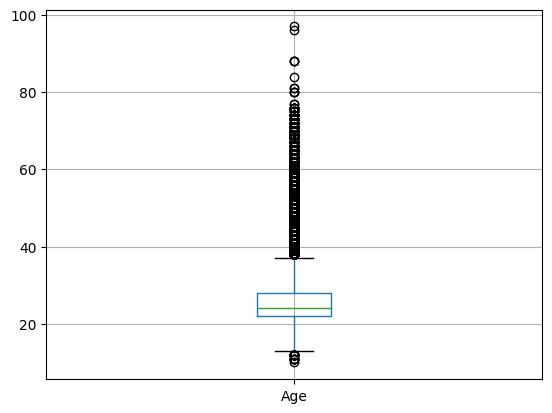

In [60]:
summer.boxplot(column='Age',by=None,ax=None)

<Axes: >

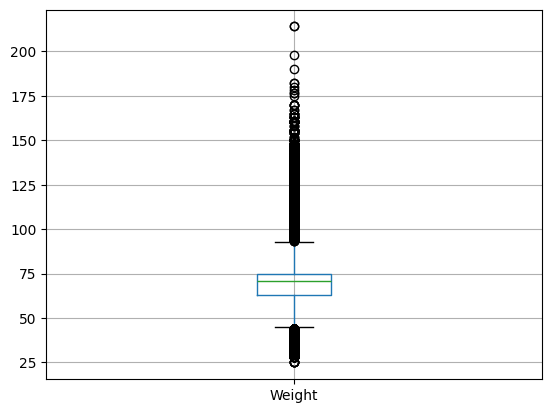

In [62]:
summer.boxplot(column='Weight',by=None,ax=None)

In [65]:
summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.00000,70.702393,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No Medal


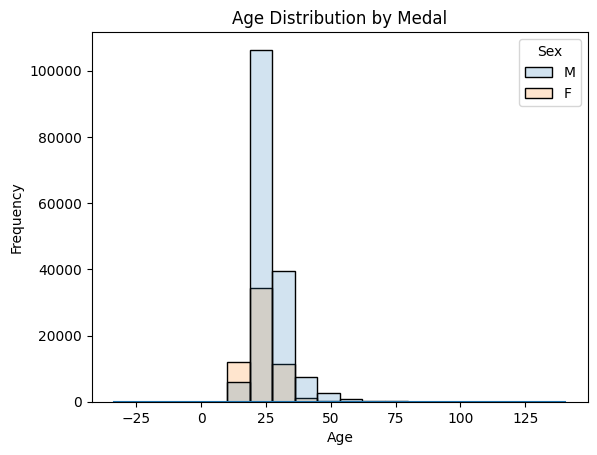

In [74]:
import seaborn as sns

# Plot histogram with hue
sns.histplot(data=summer, x='Age', bins=10, hue='Sex', kde=False, alpha=0.2)
summer['Age'].plot.density()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Medal')
plt.show()


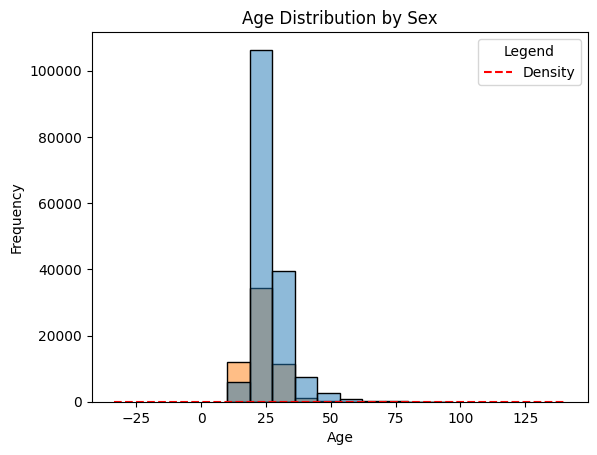

In [75]:
## Density plot (Proportion of the data)
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram with hue
sns.histplot(data=summer, x='Age', bins=10, hue='Sex', kde=False, alpha=0.5)

# Add density plot for the overall 'Age' distribution
summer['Age'].plot.density(color='red', linestyle='--', label='Density')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Sex')
plt.legend(title='Legend')
plt.show()


## Exploring Binary and Categorical Data

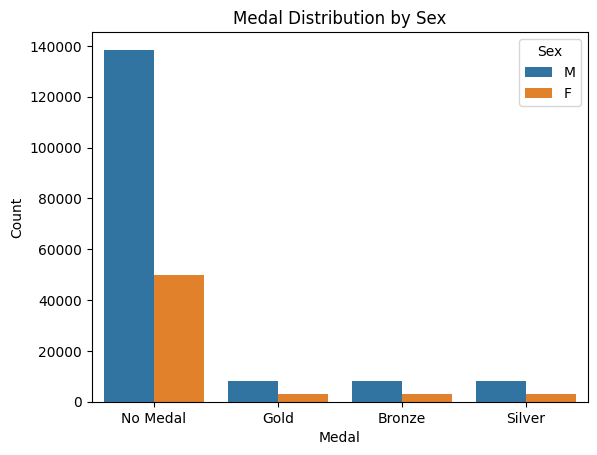

In [81]:
sns.countplot(x='Medal', hue='Sex', data=summer)
plt.xlabel('Medal')
plt.ylabel('Count')
plt.title('Medal Distribution by Sex')
plt.show()


## Pie Chart

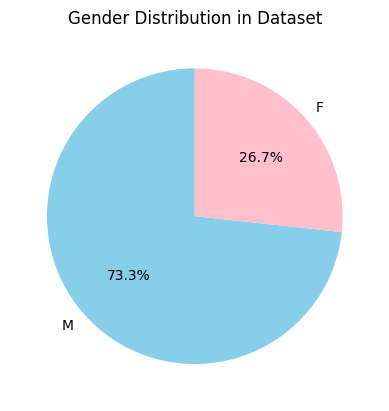

In [84]:
# Calculate counts for each category
sex_counts = summer['Sex'].value_counts()

# Create the pie chart
ax = sex_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])

# Add a title
plt.title('Gender Distribution in Dataset')
plt.ylabel('')  # Optional: Remove y-axis label for clarity
plt.show()


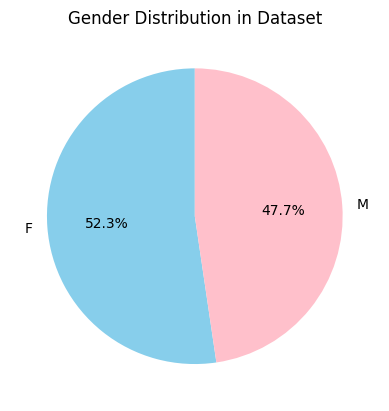

In [108]:
# Calculate counts for each category
sex_counts = summer[summer['Team']=='China']['Sex'].value_counts()

# Create the pie chart
ax = sex_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])

# Add a title
plt.title('Gender Distribution in Dataset')
plt.ylabel('')  # Optional: Remove y-axis label for clarity
plt.show()

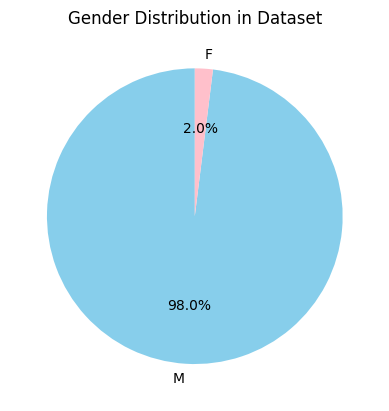

In [107]:
# Calculate counts for each category
sex_counts = summer[summer['Team']=='Pakistan']['Sex'].value_counts()

# Create the pie chart
ax = sex_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])

# Add a title
plt.title('Gender Distribution in Dataset')
plt.ylabel('')  # Optional: Remove y-axis label for clarity
plt.show()

## Correlatipn

In [93]:
#summer['Age'].corr()

In [100]:
summer[['Height','Weight','Age','Year']].corr()

,Height,Weight,Age,Year
Height,1.000000,0.785060,0.101854,0.036204
Weight,0.785060,1.000000,0.158178,0.010760
Age,0.101854,0.158178,1.000000,-0.107223
Year,0.036204,0.010760,-0.107223,1.000000


<Axes: xlabel='[Age]', ylabel='[Weight]'>

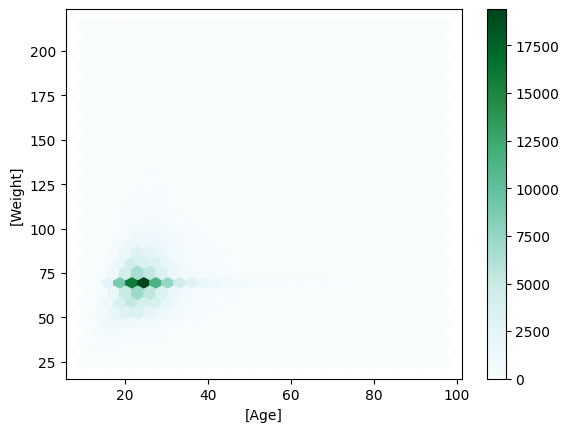

In [104]:
summer.plot.hexbin(x=['Age'],y=['Weight'],gridsize=30)

<Axes: xlabel='[Height]', ylabel='[Weight]'>

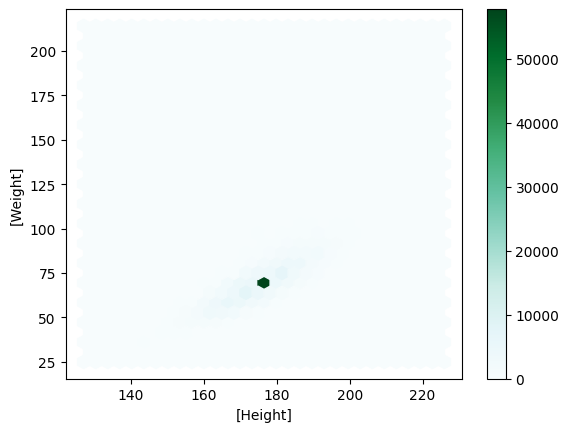

In [105]:
summer.plot.hexbin(x=['Height'],y=['Weight'],gridsize=30)

## Heat Map

<Axes: >

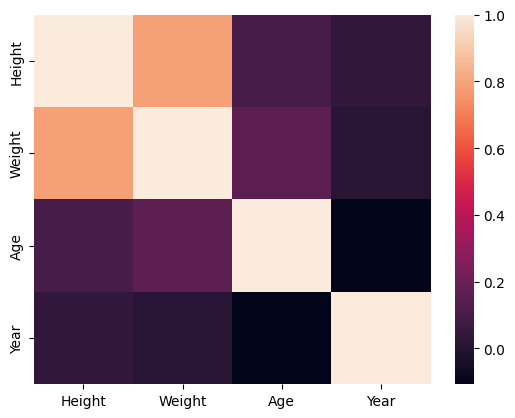

In [106]:
sns.heatmap(summer[['Height','Weight','Age','Year']].corr())

## Medal Analysis

In [109]:
summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.00000,70.702393,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No Medal


In [113]:
summer.groupby(['Team']['Medal']).count().reset_index().sort_values(by='Medal',ascending=False)

<>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
C:\Users\Acer\AppData\Local\Temp\ipykernel_31728\3297859316.py:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  summer.groupby(['Team']['Medal']).count().reset_index().sort_values(by='Medal',ascending=False)
C:\Users\Acer\AppData\Local\Temp\ipykernel_31728\3297859316.py:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  summer.groupby(['Team']['Medal']).count().reset_index().sort_values(by='Medal',ascending=False)
C:\Users\Acer\AppData\Local\Temp\ipykernel_31728\3297859316.py:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  summer.groupby(['Team']['Medal']).count().reset_index().sort_values(by='Medal',ascending=False)


TypeError: list indices must be integers or slices, not str

In [145]:
# Corrected code
result = (
    summer.groupby(['Team', 'Medal'])
    .size()
    .reset_index(name='Count')
    .sort_values(by=['Count','Team'], ascending=False)
)

print(result)


               Team     Medal  Count
1518  United States  No Medal   9840
582   Great Britain  No Medal   8711
508          France  No Medal   8613
729           Italy  No Medal   6667
241          Canada  No Medal   6021
...             ...       ...    ...
106          Baby-1      Gold      1
77         Augsburg  No Medal      1
63        Ariette-8  No Medal      1
39        Angerburg  No Medal      1
10         Alcyon-6  No Medal      1

[1637 rows x 3 columns]


In [146]:
type(result)

pandas.core.frame.DataFrame

In [147]:
medals = result[result['Medal']!='No Medal']

In [148]:
countries = medals.head(30)

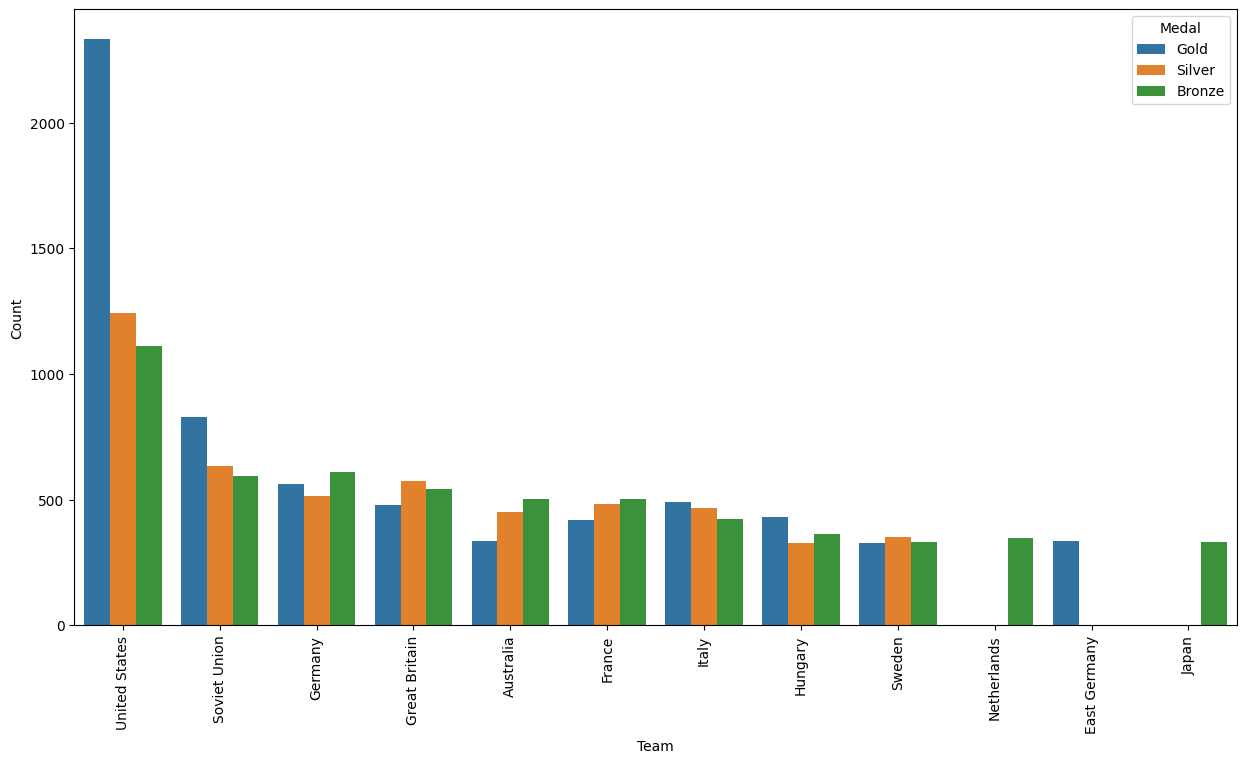

In [149]:
plt.figure(figsize=(15,8))
sns.barplot(x='Team', y='Count', hue='Medal', data=countries)

plt.xticks(rotation=90)
plt.show()


In [151]:
summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.00000,70.702393,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No Medal


In [161]:
china = summer[summer['Team']=='China'].groupby(['Medal','Sex'])['Medal'].count()

In [163]:
china

Medal     Sex
Bronze    F       164
          M        74
Gold      F       173
          M       121
No Medal  F      1635
          M      1713
Silver    F       215
          M        84
Name: Medal, dtype: int64

In [165]:
china = summer[summer['Team'] == 'China'].groupby(['Medal', 'Sex']).size().reset_index(name='Count')
print(china)


      Medal Sex  Count
0    Bronze   F    164
1    Bronze   M     74
2      Gold   F    173
3      Gold   M    121
4  No Medal   F   1635
5  No Medal   M   1713
6    Silver   F    215
7    Silver   M     84


<Axes: xlabel='Medal', ylabel='Count'>

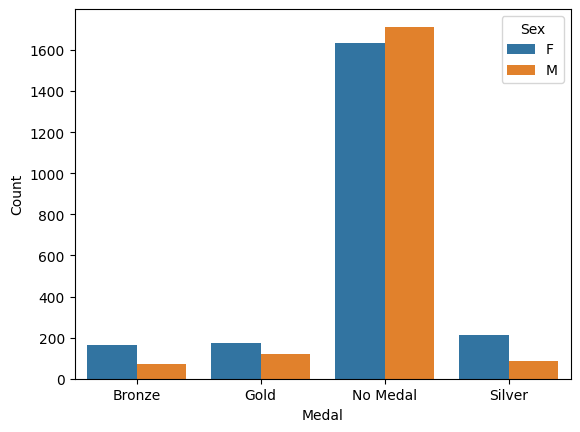

In [166]:
sns.barplot(x='Medal',y='Count',data=china,hue='Sex')